## Елисеев Е.В.
## Нейросеть бинарной классификации свежести мяса

Данные взяты с <a href="https://www.kaggle.com/datasets/crowww/meat-quality-assessment-based-on-deep-learning">kaggle<a>

In [1]:
import os.path
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

2024-08-28 20:06:24.089320: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-28 20:06:24.097617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 20:06:24.107343: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-28 20:06:24.110088: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-28 20:06:24.117321: I tensorflow/core/platform/cpu_feature_guar

In [2]:
data_path = Path("meat_data")
img_path = list(data_path.glob(r"*/*.jpg"))

# (классов поровну)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],img_path))
img_pathes = pd.Series(img_path, name="img").astype(str)
labels = pd.Series(labels, name="label")

data_df = pd.concat([img_pathes, labels], axis=1)
data_df

,img,label
0,meat_data/Fresh/test_20171016_104321D.jpg,Fresh
1,meat_data/Fresh/test_20171016_104521D.jpg,Fresh
2,meat_data/Fresh/test_20171016_104721D.jpg,Fresh
3,meat_data/Fresh/test_20171016_104921D.jpg,Fresh
4,meat_data/Fresh/test_20171016_105121D.jpg,Fresh
...,...,...
1891,meat_data/Spoiled/test_20171019_025721D.jpg,Spoiled
1892,meat_data/Spoiled/test_20171019_025921D.jpg,Spoiled
1893,meat_data/Spoiled/test_20171019_030121D.jpg,Spoiled
1894,meat_data/Spoiled/test_20171019_030721D.jpg,Spoiled


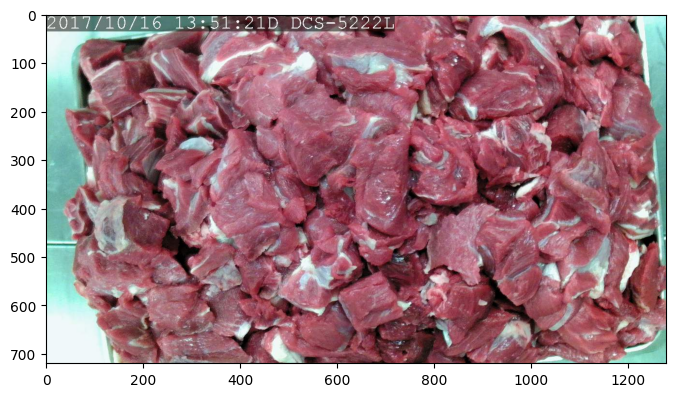

In [3]:
# Пример изрображения свежего мяса
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(data_df[data_df["label"] == "Fresh"]["img"][99]))
plt.show()

In [1]:
train, test = train_test_split(data_df, test_size=0.2)

batch_size = 4
epochs = 15
img_size = 150

data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = data_gen.flow_from_dataframe(
    dataframe=train,
    x_col="img",
    y_col="label",
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    target_size=(img_size, img_size),
    subset="training"
)

val_gen = data_gen.flow_from_dataframe(
    dataframe=train,
    x_col="img",
    y_col="label",
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    target_size=(img_size, img_size),
    subset="validation"
)

test_gen = data_gen.flow_from_dataframe(
    dataframe=test,
    x_col="img",
    y_col="label",
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    target_size=(img_size, img_size)
)

# Создание модели
model = Sequential([
    Rescaling(1./255, input_shape=(img_size, img_size, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(2, activation="softmax")
])

# Компиляция модели
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

NameError: name 'train_test_split' is not defined

In [9]:
import time

start_time = time.time()
model.fit(train_gen,
          validation_data=val_gen,
          epochs=epochs,
          batch_size=batch_size)
end_time = time.time()
# Оценка модели
results = model.evaluate(test_gen)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")
print(f"Время выполнения: {end_time - start_time} секунд")

Epoch 1/15


/home/sanero/miniconda3/envs/dl/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.5410 - loss: 28.9871 - val_accuracy: 0.9010 - val_loss: 0.4608
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.6820 - loss: 0.7360 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.4764 - loss: 0.6938 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.5271 - loss: 0.6926 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.5037 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.5244 - loss: 0.6927 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.5032 - loss: 0.6933 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.4983 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 

Время выполнения: 67.16599988937378 секунд

### Демонстрация работы нейронной сети

1/1 [==============================] - 0s 50ms/step
Испорченное мясо


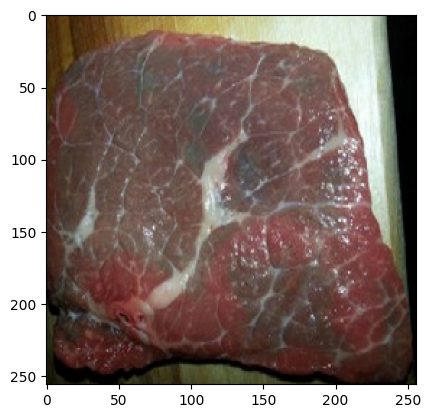

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np


def predict(model, img):
    # Загрузка сохраненной модели
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Нормализация
    plt.imshow(img_array[0])
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    if predicted_class == 0:
        print("Свежее мясо")
    else:
        print("Испорченное мясо")
            

loaded_model = load_model('model/my_model')
image_path = f"data/test1.jpg"

img = image.load_img(image_path, target_size=(256, 256))
predict(loaded_model, img)

1/1 [==============================] - 0s 11ms/step
Свежее мясо


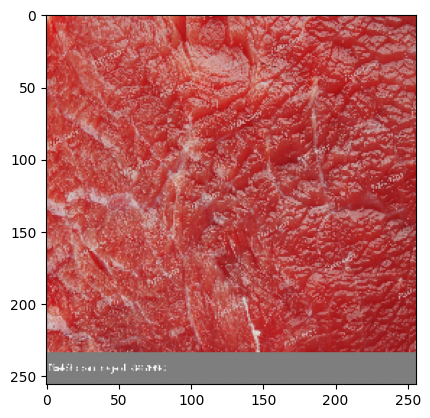

In [9]:
image_path = f"data/test2.jpg"

img = image.load_img(image_path, target_size=(256, 256))
predict(loaded_model, img)